# Imports

In [193]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import plots


In [208]:
data = pd.read_csv('input/creditcard.csv')



In [209]:
print(data.shape)


(284807, 31)


# Train-test split of data 

In [210]:
X = data.drop(['Class','Time'],axis = 1) 
y = pd.DataFrame(data['Class'] )
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.90)


In [211]:
Fraud = train_y[train_y['Class'] == 1]
Valid = train_y[train_y['Class'] == 0]
print('Fraud:')
print(len(Fraud))
print('Valid:')
print(len(Valid))


Fraud:
455
Valid:
255871


# Isolation forest - Trainining and prediction

In [212]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
isolationForest = IsolationForest(max_samples = len(train_X),contamination = outlier_fraction).fit(train_X) 
y_test_pred = isolationForest.predict(test_X)
y_test_pred[y_test_pred == 1] = 0 
y_test_pred[y_test_pred == -1] = 1


0.0017782398161573605


[1.0, 1.0, 1.0]
[0.28, 0.35, 0.31]
plotMat: [[1.0, 1.0, 1.0], [0.28, 0.35, 0.31]]
support: [28444, 37]


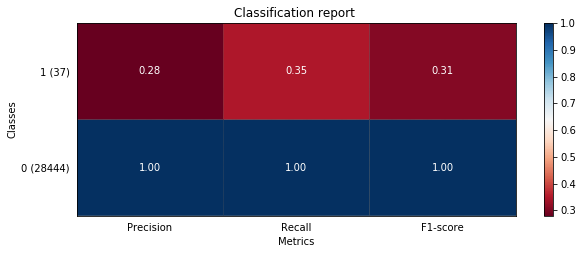

In [213]:
plot_classification_report(classification_report(test_y['Class'],y_test_pred))

# KNN


no of neighbours:
1
[1.0, 1.0, 1.0]
[0.88, 0.8, 0.84]
plotMat: [[1.0, 1.0, 1.0], [0.88, 0.8, 0.84]]
support: [28435, 46]
no of neighbours:
3
[1.0, 1.0, 1.0]
[0.94, 0.72, 0.81]
plotMat: [[1.0, 1.0, 1.0], [0.94, 0.72, 0.81]]
support: [28435, 46]
no of neighbours:
5
[1.0, 1.0, 1.0]
[0.94, 0.7, 0.8]
plotMat: [[1.0, 1.0, 1.0], [0.94, 0.7, 0.8]]
support: [28435, 46]
no of neighbours:
7
[1.0, 1.0, 1.0]
[0.94, 0.67, 0.78]
plotMat: [[1.0, 1.0, 1.0], [0.94, 0.67, 0.78]]
support: [28435, 46]


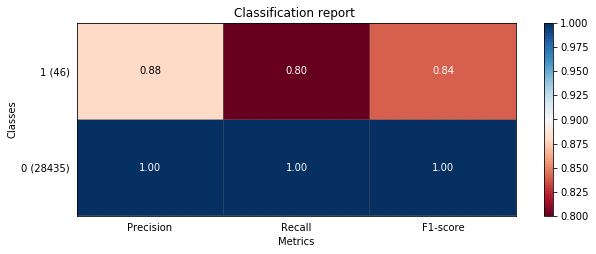

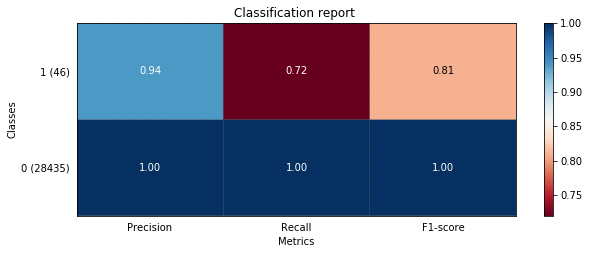

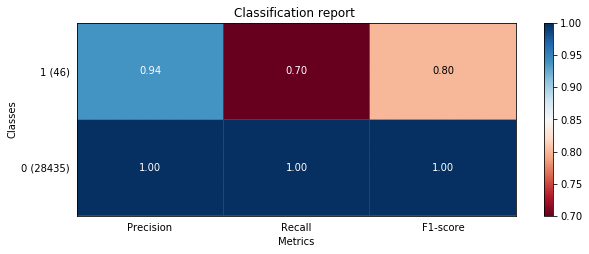

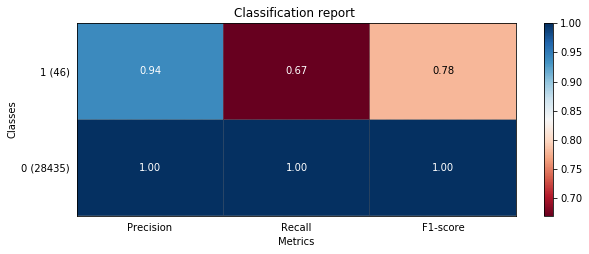

In [201]:
neighbors = [1,3,5,7]

for k in neighbors:
    print('no of neighbours:')
    print(k)
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(train_X,train_y)
    y_test_pred = KNN.predict(test_X) 
    plot_classification_report(classification_report(test_y['Class'],y_test_pred))    
    

# k-means

In [176]:
train_X=normalize(train_X)
test_X=normalize(test_X)


[0.99877085, 0.80050665, 0.88871528]
[0.00543764, 0.52542373, 0.01076389]
plotMat: [[0.99877085, 0.80050665, 0.88871528], [0.00543764, 0.52542373, 0.01076389]]
support: [28422, 59]


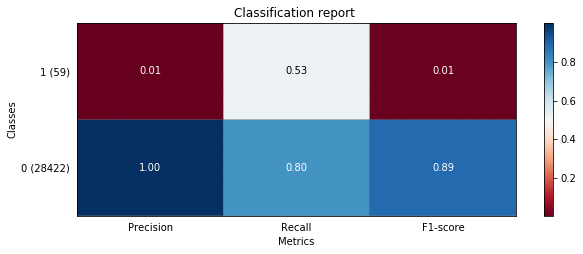

In [194]:
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(train_X)
kmeans_predicted_train_labels=kmeans.predict(train_X)


#print(classification_report(test_y,kmeans_predicted_test_labels,digits=8))
plot_classification_report(classification_report(test_y,kmeans_predicted_test_labels,digits=8))

